### Portfolio of Oil Exploration Assets: Learning Options, Sequential Drilling Options and Defer Options 
####  Marco Antonio Guimarães Dias, 
#### Luigi de Magalhães Detomi Calvette
##### RO Congress - Boston 2017


[Paper](http://www.realoptions.org/openconf2017/data/papers/57.pdf)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import time

In [3]:
###Dados de Entrada###
r=np.log(1+0.03)
#print(r)
delta=np.log(1+0.038)
sigma=0.3
tau=3
Po=50


In [158]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_Guy.csv", sep=';')
case.set_index('Type', inplace=True)
case=case.astype(float).T
case

Type,DogFish,Feather,Head
CF,0.30,0.25,0.20
I_w,80.00,60.00,80.00
q,0.15,0.14,0.15
B,450.00,400.00,500.00
Owner,0.00,1.00,1.00


In [159]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_Guy_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,DogFish,Feather,Head
Type,,,
DogFish,1.0,0.6,0.5
Feather,0.6,1.0,0.6
Head,0.5,0.6,1.0


In [160]:
###############Bloco 1####################3


In [161]:
case_b1=pd.read_csv("Case_Guy_b1.csv", sep=';')
case_b1.set_index('Type', inplace=True)
case_b1=case_b1.astype(float).T
case_b1

Type,Feather,Head
CF,0.25,0.20
I_w,60.00,80.00
q,0.14,0.15
B,400.00,500.00
Owner,1.00,1.00


In [162]:
case_corr_b1=pd.read_csv("Case_Guy_corr_b1.csv", sep=';')
case_corr_b1.set_index('Type', inplace=True)
case_corr_b1


,Feather,Head
Type,,
Feather,1.0,0.6
Head,0.6,1.0


In [163]:
###############Bloco 2##########################


In [164]:
case_b2=pd.read_csv("Case_Guy_b2.csv", sep=';')
case_b2.set_index('Type', inplace=True)
case_b2=case_b2.astype(float).T
case_b2

Type,DogFish
CF,0.30
I_w,80.00
q,0.15
B,450.00
Owner,0.00


In [165]:
case_corr_b2=pd.read_csv("Case_Guy_corr_b2.csv", sep=';')
case_corr_b2.set_index('Type', inplace=True)
case_corr_b2


,DogFish
Type,
DogFish,1


In [60]:
def V(P,case,w):
    valor=P*case.iloc[2,k[w]]*case.iloc[3,k[w]]
    return valor

    
    

In [139]:
def I(P,case,w):
    #c=0.047*P+3
    invest=(case.iloc[3,k[w]]*5.35 + 650)*P/50
    return invest

In [140]:
def VME(P,case,i):
    VPL=P*case.iloc[2,i]*case.iloc[3,i] - (case.iloc[3,i]*(0.047*P+3) + 650)
    vme=case.iloc[0,i]*VPL - case.iloc[1,i]
    return vme

In [141]:
print(VME(50,case,0))
print(VME(50,case,1))
print(VME(50,case,2))


15.25
-57.499999999999886
5.0


In [142]:
VME(50,case,0)+VME(50,case,1) + VME(50,case,2)

-37.249999999999886

In [143]:
VME(50,case,0)+VME(50,case,1)

-42.249999999999886

In [144]:
#################Formalizacao caso - correto
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
    
    m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
    
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(P,case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(P,case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        #print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
    #print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    


###Fornece o melhor portfolio seq_winner e o valor do porfolio winner

winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

seq_sec=list(seq)
num=np.argmax(fold)
fold_sec=list(fold)
fold_sec.remove(np.amax(fold))
del seq_sec[num]
    
second=np.amax(fold_sec)
Seq_sec=seq_sec[np.argmax(fold_sec)]
second=np.maximum(0,second)
if second==0:
    Seq_sec='W'

diff=winner-second

    
    
            

    #print(fold)
    #print(m)
print('melhor:',Seq_winner, '$melhor:', winner,'segundo:',Seq_sec,'$Segundo:',second,'diff:',diff, fold)
#print(fold)
    
    
    
print(np.argmax(fold))    
    
    

melhor: (0, 2, 1) $melhor: 55.70189340712465 segundo: (0, 1, 2) $Segundo: 43.637694116977855 diff: 12.064199290146796 [43.637694116977855, 55.70189340712465, 30.138107404628684, 29.530967449841825, 37.14935566296958, 26.68858614751098]
1


In [145]:
seq,seq_sec

([(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)],
 [(0, 1, 2), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)])

In [146]:
fold,fold_sec


([43.637694116977855,
  55.70189340712465,
  30.138107404628684,
  29.530967449841825,
  37.14935566296958,
  26.68858614751098],
 [43.637694116977855,
  30.138107404628684,
  29.530967449841825,
  37.14935566296958,
  26.68858614751098])

In [147]:
num

1

In [148]:
np.argmax(fold)

1

In [149]:
fold

[43.637694116977855,
 55.70189340712465,
 30.138107404628684,
 29.530967449841825,
 37.14935566296958,
 26.68858614751098]

In [153]:
def carteira(case,case_corr,P):
    #################Formalizacao caso 4 - correto
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan


        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)*P/50) -case.iloc[1,k[0]]

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)
                    
                    Ax_pi.append(CF_s*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*P/50) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)*P/50) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'
    
    
    seq_sec=list(seq)
    num=np.argmax(fold)
    fold_sec=list(fold)
    fold_sec.remove(np.amax(fold))
    del seq_sec[num]
    
    second=np.amax(fold_sec)
    Seq_sec=seq_sec[np.argmax(fold_sec)]
    second=np.maximum(0,second)
    if second==0:
        Seq_sec='W'
    diff=winner-second



        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,Seq_sec, second, diff,fold]







In [154]:
cart=carteira(case,case_corr,50)
print(cart)

[(0, 2, 1), 55.70189340712465, (0, 1, 2), 43.637694116977855, 12.064199290146796, [43.637694116977855, 55.70189340712465, 30.138107404628684, 29.530967449841825, 37.14935566296958, 26.68858614751098]]


In [155]:
cart=carteira(case_b1,case_corr_b1,50)
print(cart)

[(0, 1), 15.25, 'W', 0.0, 15.25, [15.25, 0.0]]


In [156]:
for i in range(200):
    print(i, carteira(case,case_corr,i)[0],carteira(case,case_corr,i)[1],carteira(case,case_corr,i)[3],carteira(case,case_corr,i)[2], carteira(case,case_corr,i)[4] )

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 (0, 2, 1) 1.4032496487022499 0.0 W 1.4032496487022499
34 (0, 2, 1) 4.59728751684478 0.0 W 4.59728751684478
35 (0, 2, 1) 7.79132538498725 0.0 W 7.79132538498725
36 (0, 2, 1) 10.985363253129506 0.0 W 10.985363253129506
37 (0, 2, 1) 14.179401121272182 2.7754704194071316 (0, 1, 2) 11.40393070186505
38 (0, 2, 1) 17.373438989414794 5.91871839614333 (0, 1, 2) 11.454720593271464
39 (0,

141 (2, 0, 1) 348.3050000000002 348.30500000000006 (0, 2, 1) 1.1368683772161603e-13
142 (0, 2, 1) 351.91000000000025 351.91000000000025 (2, 0, 1) 0.0
143 (0, 2, 1) 355.5149999999999 355.5149999999998 (2, 0, 1) 5.684341886080802e-14
144 (0, 2, 1) 359.119999999999 359.119999999999 (2, 0, 1) 0.0
145 (0, 2, 1) 362.725 362.72499999999997 (2, 0, 1) 5.684341886080802e-14
146 (2, 0, 1) 366.33000000000015 366.3300000000001 (0, 2, 1) 5.684341886080802e-14
147 (0, 2, 1) 369.9350000000003 369.9350000000003 (2, 0, 1) 0.0
148 (2, 0, 1) 373.53999999999985 373.5399999999998 (0, 2, 1) 5.684341886080802e-14
149 (0, 2, 1) 377.14499999999896 377.14499999999896 (2, 0, 1) 0.0
150 (0, 2, 1) 380.75000000000006 380.75 (2, 0, 1) 5.684341886080802e-14
151 (0, 2, 1) 384.35500000000013 384.3550000000001 (2, 0, 1) 5.684341886080802e-14
152 (0, 2, 1) 387.96000000000026 387.96000000000026 (2, 0, 1) 0.0
153 (0, 2, 1) 391.5649999999998 391.5649999999998 (2, 0, 1) 0.0
154 (0, 2, 1) 395.169999999999 395.169999999999 (2, 

In [167]:
for i in range(200):
    print(i, carteira(case_b1,case_corr_b1,i)[0],carteira(case_b1,case_corr_b1,i)[1],carteira(case_b1,case_corr_b1,i)[3],carteira(case_b1,case_corr_b1,i)[2], carteira(case_b1,case_corr_b1,i)[4] )

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 W 0.0 0.0 W 0.0
36 W 0.0 0.0 W 0.0
37 W 0.0 0.0 W 0.0
38 W 0.0 0.0 W 0.0
39 W 0.0 0.0 W 0.0
40 W 0.0 0.0 W 0.0
41 W 0.0 0.0 W 0.0
42 W 0.0 0.0 W 0.0
43 W 0.0 0.0 W 0.0
44 W 0.0 0.0 W 0.0
45 W 0.0 0.0 W 0.0
46 W 0.0 0.0 W 0.0
47 W 0.0 0.0 W 0.0
48 (1, 0) 1.599999999999909 0.0 W 1.599999999999909
49 (1, 0) 3.3000000000000114 0.0 W 3.300000000

168 (1, 0) 205.60000000000002 154.00000000000054 (0, 1) 51.59999999999948
169 (1, 0) 207.29999999999967 155.74999999999991 (0, 1) 51.549999999999756
170 (1, 0) 209.0 157.5 (0, 1) 51.5
171 (1, 0) 210.7 159.25000000000017 (0, 1) 51.44999999999982
172 (1, 0) 212.40000000000003 160.99999999999991 (0, 1) 51.40000000000012
173 (1, 0) 214.10000000000002 162.7500000000005 (0, 1) 51.34999999999951
174 (1, 0) 215.79999999999967 164.49999999999991 (0, 1) 51.299999999999756
175 (1, 0) 217.5 166.25000000000045 (0, 1) 51.249999999999545
176 (1, 0) 219.2 168.00000000000017 (0, 1) 51.19999999999982
177 (1, 0) 220.90000000000003 169.7499999999999 (0, 1) 51.15000000000015
178 (1, 0) 222.60000000000002 171.50000000000009 (0, 1) 51.09999999999994
179 (1, 0) 224.29999999999967 173.24999999999943 (0, 1) 51.05000000000024
180 (1, 0) 226.0 175.00000000000045 (0, 1) 50.999999999999545
181 (1, 0) 227.70000000000005 176.75000000000063 (0, 1) 50.94999999999942
182 (1, 0) 229.40000000000003 178.50000000000037 (0, 

In [183]:
def diffinexpcart(case,case_corr,P,r,div,sigma,tau,accur):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    #accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=4*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira(case,case_corr,Pt[i])
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira(case,case_corr,Pt[i])
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]  #opcao americana 
            
            
            
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira(case,case_corr,Pt[i])
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j-1])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid+1],dframe,T,Pt,F,Gatilho]



In [132]:
accur=0.05
start=time.time()
solucao=diffinexpcart(case,case_corr,50,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 7.0204994956652325


In [84]:
solucao[0]

307.39377068037936

In [85]:
solucao[1]

,W,"(1, 0, 2)","(0, 1, 2)","(2, 1, 0)","(0, 2, 1)"
0.000000,100.0,165.0,195.0,197.5,192.5
0.001735,100.0,165.0,195.0,197.5,192.5
0.003470,100.0,165.0,195.0,197.5,192.5
0.005205,100.0,165.0,195.0,197.5,192.5
0.006940,100.0,165.0,195.0,197.5,192.5
...,...,...,...,...,...
2.993060,62.5,165.0,195.0,197.5,192.5
2.994795,60.0,165.0,195.0,197.5,192.5
2.996530,60.0,165.0,195.0,197.5,192.5
2.998265,60.0,165.0,195.0,197.5,192.5


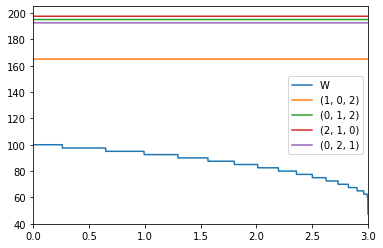

In [86]:
solucao[1].plot()

In [87]:
solucao[5].shape

(1730, 81)

In [88]:
ima=solucao[5]

In [89]:
ima

array([['W', 'W', 'W', ..., (2, 1, 0), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (2, 1, 0), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (2, 1, 0), (0, 1, 2), (0, 1, 2)],
       ...,
       ['W', 'W', 'W', ..., (2, 1, 0), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (2, 1, 0), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (2, 1, 0), (0, 1, 2), (0, 1, 2)]],
      dtype=object)

In [90]:
ima[1000,80]==(0,1,2)

True

In [91]:
solucao[4]

array([[0.00000000e+00, 9.96921275e-06, 7.69014518e-04, ...,
        4.82097500e+03, 4.90473750e+03, 4.90473750e+03],
       [0.00000000e+00, 9.91663664e-06, 7.65561768e-04, ...,
        4.82097500e+03, 4.90473750e+03, 4.90473750e+03],
       [0.00000000e+00, 9.86429518e-06, 7.62121559e-04, ...,
        4.82097500e+03, 4.90473750e+03, 4.90473750e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.82097500e+03, 4.90473750e+03, 4.90473750e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.82097500e+03, 4.90473750e+03, 4.90473750e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.82097500e+03, 4.90473750e+03, 4.98850000e+03]])

In [92]:
ima.shape

(1730, 81)

In [93]:
w, h = ima.shape[0], ima.shape[1]
data = np.zeros((h,w, 3), dtype=np.uint8)
d1=np.zeros((h,w))
for i in range(ima.shape[0]):
    for j in range(ima.shape[1]):
        #print(j)
        if ima[i,j]=='W':
            data[ima.shape[1]-j-1,i]=[0,0,0]
            d1[ima.shape[1]-j-1,i]=0
        elif ima[i,j]==(0,1,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=1
        elif ima[i,j]==(0,2,1):
            data[ima.shape[1]-j-1,i]=[255,100,0]
            d1[ima.shape[1]-j-1,i]=2
        elif ima[i,j]==(1,0,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=3
        elif ima[i,j]==(1,2,0):
            data[ima.shape[1]-j-1,i]=[255,255,0]
            d1[ima.shape[1]-j-1,i]=4
        elif ima[i,j]==(2,1,0):
            data[ima.shape[1]-j-1,i]=[0,0,255]
            d1[ima.shape[1]-j-1,i]=5
        elif ima[i,j]==(2,0,1):
            data[ima.shape[1]-j-1,i]=[100,0,255]
            d1[ima.shape[1]-j-1,i]=6
        
        

In [94]:
d1frame=pd.DataFrame(d1)
d1frame.columns=solucao[2]
d1frame.index=solucao[3][::-1]

In [95]:
d1frame.head()

,0.000000,0.001735,0.003470,0.005205,0.006940,0.008676,0.010411,0.012146,0.013881,0.015616,...,2.984384,2.986119,2.987854,2.989589,2.991324,2.993060,2.994795,2.996530,2.998265,3.000000
200.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
197.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
195.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
192.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
190.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


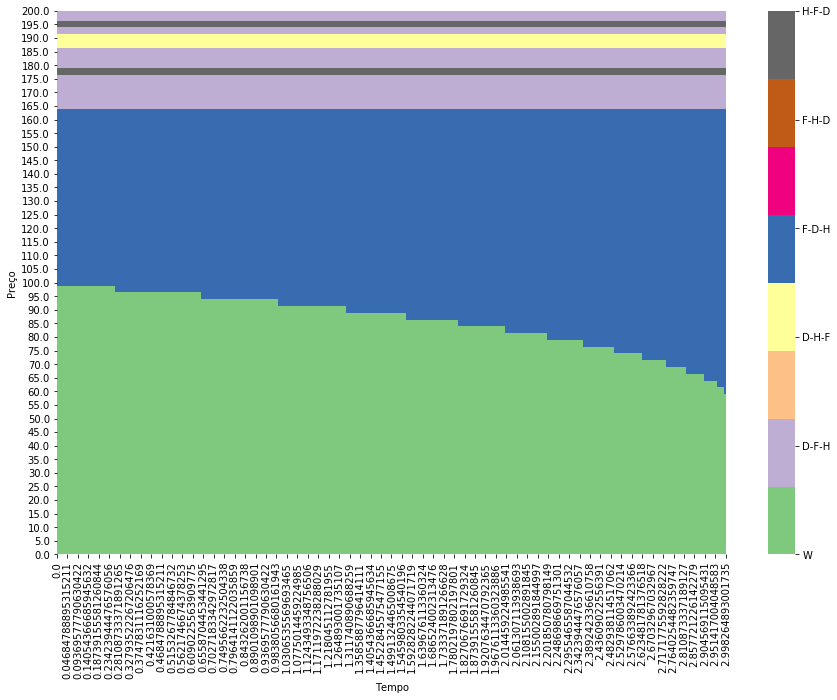

In [99]:

fig, ax=plt.subplots(figsize=(15,10))
#cbar_ax=fig.add_axes([0,1,2,3,4,5,6])
ax=sns.heatmap(d1frame, cmap="Accent")
#ax.locator_params(axis='x', nbins=4)
#ax.locator_params(axis='y',nbins=4)


#colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([0,1,2,3,4,5])
#colorbar.set_ticklabels(['W', '0-1-2', '0-2-1','1-0-2','1-2-0','2-1-0'])
#colorbar.set_ticklabels(['W', 'D-F-H', 'D-H-F','F-D-H','F-H-D','H-F-D'])

# X - Y axis labels
ax.set_ylabel('Preço');
ax.set_xlabel('Tempo');

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks();
plt.setp(labels, rotation=0);

#ax.set(xticklabels=solucao[2]);



In [100]:
######################################
###########Bloco b1#####################

In [179]:
case_b1

Type,Feather,Head
CF,0.25,0.20
I_w,60.00,80.00
q,0.14,0.15
B,400.00,500.00
Owner,1.00,1.00


In [180]:
case_corr_b1

,Feather,Head
Type,,
Feather,1.0,0.6
Head,0.6,1.0


In [168]:
start=time.time()
accur=0.02
solucao_b1=diffinexpcart(case_b1,case_corr_b1,50,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 16.08362979888916


In [169]:
solucao_b1[0]

17.468308016638595

In [170]:
solucao_b1[1]

,W
0.000000,95.0
0.000278,95.0
0.000556,95.0
0.000833,95.0
0.001111,95.0
...,...
2.998889,50.0
2.999167,49.0
2.999444,49.0
2.999722,49.0


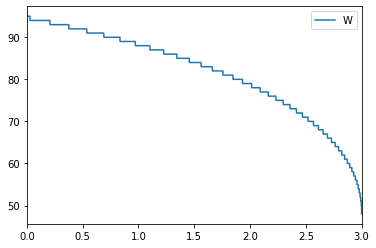

In [171]:
solucao_b1[1].plot()

In [172]:
ima=solucao_b1[5]

In [173]:
w, h = ima.shape[0], ima.shape[1]
#data = np.zeros((h,w, 3), dtype=np.uint8)
d2=np.zeros((h,w), dtype=int)
for i in range(ima.shape[0]):
    for j in range(ima.shape[1]):
        #print(j)
        if ima[i,j]=='W':
            #data[ima.shape[1]-j-1,i]=[0,0,0]
            d2[ima.shape[1]-j-1,i]=0
        elif ima[i,j]==(0,1):
            #data[ima.shape[1]-j-1,i]=[255,0,0]
            d2[ima.shape[1]-j-1,i]=1
        elif ima[i,j]==(1,0):
            #data[ima.shape[1]-j-1,i]=[255,100,0]
            d2[ima.shape[1]-j-1,i]=2
        

In [174]:
d2frame=pd.DataFrame(d2)
d2frame.columns=solucao_b1[2]
d2frame.index=solucao_b1[3][::-1]

In [175]:
d2frame

,0.000000,0.000278,0.000556,0.000833,0.001111,0.001389,0.001667,0.001944,0.002222,0.002500,...,2.997500,2.997778,2.998056,2.998333,2.998611,2.998889,2.999167,2.999444,2.999722,3.000000
200.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
199.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
198.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
197.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
196.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


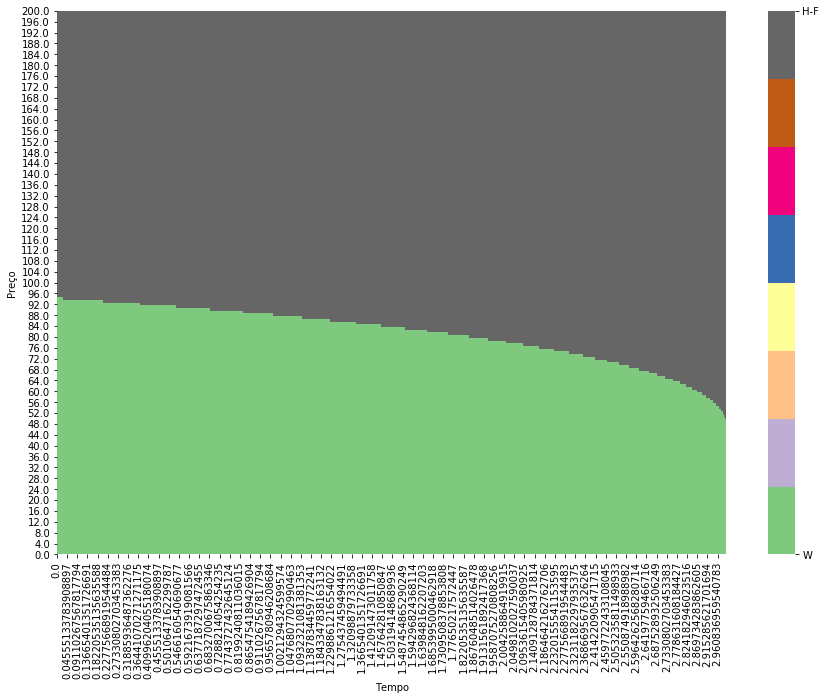

In [181]:
fig, ax=plt.subplots(figsize=(15,10))
#cbar_ax=fig.add_axes([0,1,2,3,4,5,6])
#cmap=sns.set_palette("hls",3)
ax=sns.heatmap(d2frame, cmap='Accent')
#ax=sns.set_palette("hls",3)

#ax.locator_params(axis='x', nbins=4)
#ax.locator_params(axis='y',nbins=4)


colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0,2])
#colorbar.set_ticklabels(['W', '1-0'])
colorbar.set_ticklabels(['W', 'H-F'])


# X - Y axis labels
ax.set_ylabel('Preço');
ax.set_xlabel('Tempo');

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks();
plt.setp(labels, rotation=0);

#ax.set(xticklabels=solucao[2]);



In [182]:
for i in range(200):
    print(i, carteira(case_b1,case_corr_b1,i)[0],carteira(case_b1,case_corr_b1,i)[1],carteira(case_b1,case_corr_b1,i)[3],carteira(case_b1,case_corr_b1,i)[2], carteira(case_b1,case_corr_b1,i)[4])

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 W 0.0 0.0 W 0.0
36 W 0.0 0.0 W 0.0
37 W 0.0 0.0 W 0.0
38 W 0.0 0.0 W 0.0
39 W 0.0 0.0 W 0.0
40 W 0.0 0.0 W 0.0
41 W 0.0 0.0 W 0.0
42 W 0.0 0.0 W 0.0
43 W 0.0 0.0 W 0.0
44 W 0.0 0.0 W 0.0
45 W 0.0 0.0 W 0.0
46 W 0.0 0.0 W 0.0
47 W 0.0 0.0 W 0.0
48 (1, 0) 1.599999999999909 0.0 W 1.599999999999909
49 (1, 0) 3.3000000000000114 0.0 W 3.300000000

In [ ]:
#################################
#######Individuais  e B2############

In [287]:
################################################33
###########Modelo de Competicao#################


In [466]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_Guy.csv", sep=';')
case.set_index('Type', inplace=True)
case.Owner=case.Owner.astype(int)
case=case.astype(float).T
case

Type,Payara,Pluma,LongTail
CF,0.30,0.25,0.20
I_w,80.00,60.00,80.00
q,0.15,0.14,0.15
B,450.00,400.00,500.00
Owner,1.00,1.00,0.00


In [467]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_Guy_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,Payara,Pluma,LongTail
Type,,,
Payara,1.0,0.6,0.5
Pluma,0.6,1.0,0.6
LongTail,0.5,0.6,1.0


In [ ]:
#############################################

In [465]:
#################Formalizacao caso - com competição   

####Separação do ativo do vizinho -Caso bem particular onde há um só ativo e 
sinal=1  #sinal up igual a 1 e sinal down igual a 0
stra_rho=[]
stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[0,0])
stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[1,0])

FC_viz=case[case.columns[case.loc['Owner']==0]].iloc[0,0]

case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]])
case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]],axis=1)


case=case.drop(case[case.columns[case.loc['Owner']==0]],axis=1)




                         
                         
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
                         
    #m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    #pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
    
    if sinal==1:
        
        m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(1,m[0,0],pi[0,0])
    
    elif sinal==0:
        print(0)
        m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(0,m[0,0],pi[0,0])
                         
    else:
        print(2)
        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(2,m[0,0],pi[0,0])
        
    
    
                         
                         
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        #print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
   # print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    

###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

    
    
            

    #print(fold)
    #print(m)
print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
#print(fold)
    
    
    
    
    
    

melhor portfolio é: (0, 1) e o valor é: 160.74677831484792 [160.74677831484792, 0.0]


In [197]:
print('up: melhor portfolio é: (1, 0) e o valor é: 105.52316521446231 [92.60790195949767, 105.52316521446231]')

up: melhor portfolio é: (1, 0) e o valor é: 105.52316521446231 [92.60790195949767, 105.52316521446231]


In [202]:
print('down: melhor portfolio é: W e o valor é: 0.0 [0.0, 0.0]')

down: melhor portfolio é: W e o valor é: 0.0 [0.0, 0.0]


In [207]:
print('01: melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]')

01: melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]


In [435]:
def carteira_estra(case,case_corr,P,sinal):
    #################Formalizacao caso 4 - correto
    
    sinal=1  #sinal up igual a 1 e sinal down igual a 0
    stra_rho=[]
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[0,0])
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[1,0])

    FC_viz=case[case.columns[case.loc['Owner']==0]].iloc[0,0]
    
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]])
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]],axis=1)


    case=case.drop(case[case.columns[case.loc['Owner']==0]],axis=1)

    
    
    
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan
        
        
        if sinal==1:
            m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)) -case.iloc[1,k[0]]
        
        elif sinal==0:
            m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)) -case.iloc[1,k[0]]
        
        else:
            #print(2)
            m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[5,k[0]]+650)) -case.iloc[1,k[0]]
        

        

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'





        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,fold]







In [436]:
carteira_estra(case,case_corr,50,1)

[(0, 1), 160.74677831484792, [160.74677831484792, 0.0]]

In [285]:
diffinexpcart(case,case_corr,50,r,delta,sigma,tau)[0]

14.011472926007304

In [286]:
def diffinexpcartestra(case,case_corr,sinal,P,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=4*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira_estra(case,case_ABC_corr,Pt[i],sinal)
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira_estra(case,case_corr,Pt[i],sinal)
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira_estra(case,case_corr,Pt[i],sinal)
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid],dframe,T,Pt,F]



In [178]:
def diffinexp(case,V,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.1  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaV=V*accur
    
    # M são as divisões do grid em V
    #forcei a barra- coloque 3 vezes a V de perpetuidade. Estava 1,1 
    Vmax=4*V
    M= int(Vmax/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    VGrid=int(V/deltaV) #Ponto do grid onde esta V_0. 
    deltat= (deltaV**2)/((sigma**2)*(Vmax**2)) #Convergência: Critério do peso central >=0. Vmax=3I ><1.1Gatilho_perp
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    #Vetor Vt
    Vt=np.zeros(M+1)
    Gatilho=np.zeros(N+1)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Vt[i]= i*deltaV
        #F[N,i]=np.maximum(0,Vt[i]-I)
        F[N,i]=np.maximum(0,case.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0])
    Gatilho[N]=case.iloc[0,0]*(Vt[i]/50)*case.iloc[5,0] + case.iloc[1,0]
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pd = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pd*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            if F[j,i]< case.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0] and F[j,i-1]>caseR.iloc[0,0]*(Vt[i-1]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i-1]/50)*case.iloc[5,0]) -case.iloc[1,0]:
                Gatilho[j]=(Vt[i]+Vt[i-1])/2
            
            F[j,i]=np.maximum(case.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0], F[j,i])  #opção americana
        
        
        F[j,0]=0
        F[j,M]=case.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0]
        
        
    T=np.linspace(0,tau,num=len(Gatilho))
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,VGrid],Gatilho,T,Vt,F]



In [301]:
start=time.time()

r2=diffinexpcartestra(case,case_corr,2,50,r,delta,sigma,tau)
print(r2[0])

14.011472926007304


In [302]:
r1=diffinexpcartestra(case,case_corr,1,50,r,delta,sigma,tau)

In [303]:
r0=diffinexpcartestra(case,case_corr,0,50,r,delta,sigma,tau)

In [304]:
FC_viz*r1[0] + (1-FC_viz)*r0[0]

23.248679387511107

In [305]:
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 34.52971352338791


In [330]:
start=time.time()
rabc=diffinexpcart(case_ABC,case_ABC_corr,50,r,delta,sigma,tau)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 7.226902592182159


In [325]:
caseR=case[case.columns[case.loc['Owner']==0]]
caseR

Type,R
CF,0.20
I_w,50.00
P,50.00
q,0.12
B,700.00
I_d,4000.00
Owner,0.00


In [320]:


print('VME-R',caseR.iloc[0,0]*(caseR.iloc[2,0]*caseR.iloc[3,0]*caseR.iloc[4,0] - (caseR.iloc[2,0]/50)*caseR.iloc[5,0]) -caseR.iloc[1,0])


VME-R -10.0


In [323]:
rr=diffinexp(caseR,50,r,delta,sigma,tau)

In [336]:
####
print('Portfolio sem considerar o vizinho:', r2[0])
print('Portfolio considerando o vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0])
print('Diferença - Valor adicionado pela informação do vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0] - r2[0] )
print('Portfolio do vizinho:', rr[0])
print('Portfolio incorporando o ativo do vizinho:',rabc[0])
print('Diferença - Incorporar ou não o ativo do vizinho:',rabc[0]-FC_viz*r1[0] - (1-FC_viz)*r0[0])

Portfolio sem considerar o vizinho: 14.011472926007304
Portfolio considerando o vizinho: 23.248679387511107
Diferença - Valor adicionado pela informação do vizinho: 9.237206461503803
Portfolio do vizinho: 1.9112132260213393
Portfolio incorporando o ativo do vizinho: 27.68702560763952
Diferença - Incorporar ou não o ativo do vizinho: 4.4383462201284125


In [169]:
case=pd.read_csv("Case_Guy_DogFish.csv", sep=';')
case.set_index('Type', inplace=True)
case=case.astype(float).T
case

Type,DogFish
CF,0.30
I_w,80.00
q,0.15
B,450.00
Owner,1.00
